In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [3]:
import pandas as pd 
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

/Users/koushulramjattun/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
df = pd.read_csv('rfam.csv')
# dfs = pd.read_csv('rfam_shuffled.csv')
dfs = pd.concat([pd.read_csv('nfs.csv'), pd.read_csv('rfam_shuffled.csv')])


df['is_rna'] = 1
dfs['is_rna'] = 0

len(df), len(dfs)

(8731, 21711)

In [71]:
df = df.drop_duplicates(subset='index')
dfs = dfs.drop_duplicates(subset='index')

In [72]:
len(df), len(dfs)

(8731, 14739)

In [73]:
data = pd.concat([df, dfs])
len(data)

23470

In [74]:
BASE = "ATGC"
TRINUCLEOTIDES = [nn1 + nn2 + nn3 for nn1 in BASE for nn2 in BASE for nn3 in BASE]
SHAPES = ["Hairpin", "Inner", "Stems", "Multiloop"]

In [75]:
data[TRINUCLEOTIDES] = data[TRINUCLEOTIDES].div(data.length, axis=0)
data[SHAPES] = data[SHAPES].div(data.length, axis=0)

In [76]:
features = TRINUCLEOTIDES+SHAPES+['length', 'nMFE']

In [77]:
X = data[features]

In [78]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [79]:
y = data['is_rna'].values

In [80]:
from collections import Counter
Counter(y)

Counter({1: 8731, 0: 14739})

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=True)

In [82]:
Counter(y_train), Counter(y_test)

(Counter({0: 9584, 1: 5671}), Counter({0: 5155, 1: 3060}))

In [83]:
import xgboost as  xgb
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [84]:
# clf = SVC(kernel='rbf', C=5, gamma='scale')
clf = xgb.XGBClassifier(learning_rate=0.008, n_estimators=1000, max_depth=12)
# clf = DecisionTreeClassifier(max_depth = 5)

In [85]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9380401704199635

In [86]:
y_pred = clf.predict(X_test)
acc, pre, rec = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(f'Accuracy: {acc}\nSpecificity: {pre}\nSensitivity: {rec}')

Accuracy: 0.9380401704199635
Specificity: 0.9172391233235198
Sensitivity: 0.9163398692810457


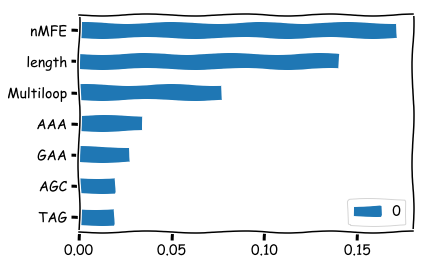

In [88]:
with plt.xkcd():
    pd.DataFrame(clf.feature_importances_, features).sort_values(by=0, ascending=False)[:7].iloc[::-1].plot(kind='barh')
    plt.show()

In [45]:
import seaborn as sns

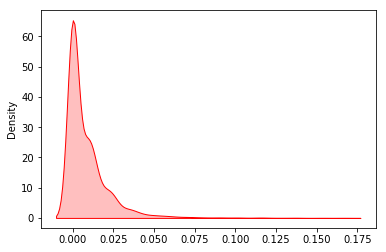

In [47]:
sns.kdeplot(df['TTT'].values, shade=True, color='red', bw=0.25)
plt.show()

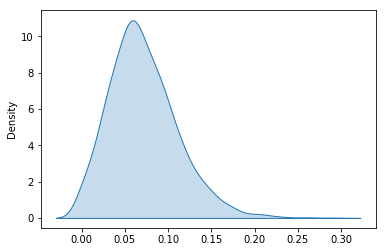

In [48]:
sns.kdeplot(dfs['TTT'].values, shade=True, bw=0.25)
plt.show()

In [89]:
test = pd.read_csv('ncrna.csv')
test = test.drop_duplicates(subset='index')
test[TRINUCLEOTIDES] = test[TRINUCLEOTIDES].div(test.length, axis=0)
test[SHAPES] = test[SHAPES].div(test.length, axis=0)

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [91]:
confusion_matrix(np.ones(len(test)), clf.predict(test[features]))

array([[  0,   0],
       [249, 261]])

In [58]:
test2 = pd.read_csv('ncrna_shuffled.csv')
test2 = test2.drop_duplicates(subset='index')
test2[TRINUCLEOTIDES] = test2[TRINUCLEOTIDES].div(test2.length, axis=0)
test2[SHAPES] = test2[SHAPES].div(test2.length, axis=0)

In [59]:
confusion_matrix(np.zeros(len(test2)), clf.predict(test2[features]))

array([[ 113, 1966],
       [   0,    0]])

In [95]:
yp = clf.predict(test2[features])

In [98]:
Counter(yp)

Counter({0: 1895, 1: 184})